In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload modules to get latest changes
import importlib
import params
import agents
import model

params = importlib.reload(params)
agents = importlib.reload(agents)
model = importlib.reload(model)

from model import NewsVendorModel


Computing optimal benchmarks (this may take a moment)...
For Testing: Supplier global optimum profit is:  316.8


In [56]:
# Configure partner prediction mode
params.USE_PARTNER_PREDICTION = False  # False = basic, True = sophisticated
params.SUPPLIER_TEAM_PLAYER = True

# Run simulation with greedy agents
agent_types = ['greedy', 'greedy', 'greedy']
model = NewsVendorModel(agent_type=agent_types)

for i in range(params.ROUNDS):
    model.step()

# Pull data 
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

In [57]:
# View agent data
agent_df

Action      Reward  Cummulative Reward  Cummulative Regret  \
Step  AgentID                                                               
1.0   1          23.3    0.000000            0.000000          537.819367   
      2           0.0    0.000000            0.000000          537.819367   
      3           2.0    0.000000            0.000000          316.800000   
2.0   1          12.4  260.000000          260.000000          815.638734   
      2          25.0  260.000000          260.000000          815.638734   
...               ...         ...                 ...                 ...   
364.0 2          39.0  300.035711       115663.359869        80102.889757   
      3           2.0    0.000000            0.000000       115315.200000   
365.0 1          20.2  488.608176       116151.968045        80152.100948   
      2          39.0  488.608176       116151.968045        80152.100948   
      3           2.0    0.000000            0.000000       115632.000000   

                   Role  
Step  AgentID            
1.0   1           price  
      2        quantity  
      3        supplier  
2.0   1           price  
      2        quantity  
...                 ...  
364.0 2        quantity  
      3        supplier  
365.0 1           price  
      2        quantity  
      3        supplier  

[1095 rows x 5 columns]

In [58]:
# View model data
model_df

,Regret,Demand
0,537.819367,21.497171
1,277.819367,46.200159
2,363.619367,53.604512
3,230.419367,65.305647
4,527.919367,72.439648
...,...,...
360,54.768919,27.774775
361,-53.486193,33.133939
362,-171.980633,39.298242
363,237.783656,18.714639


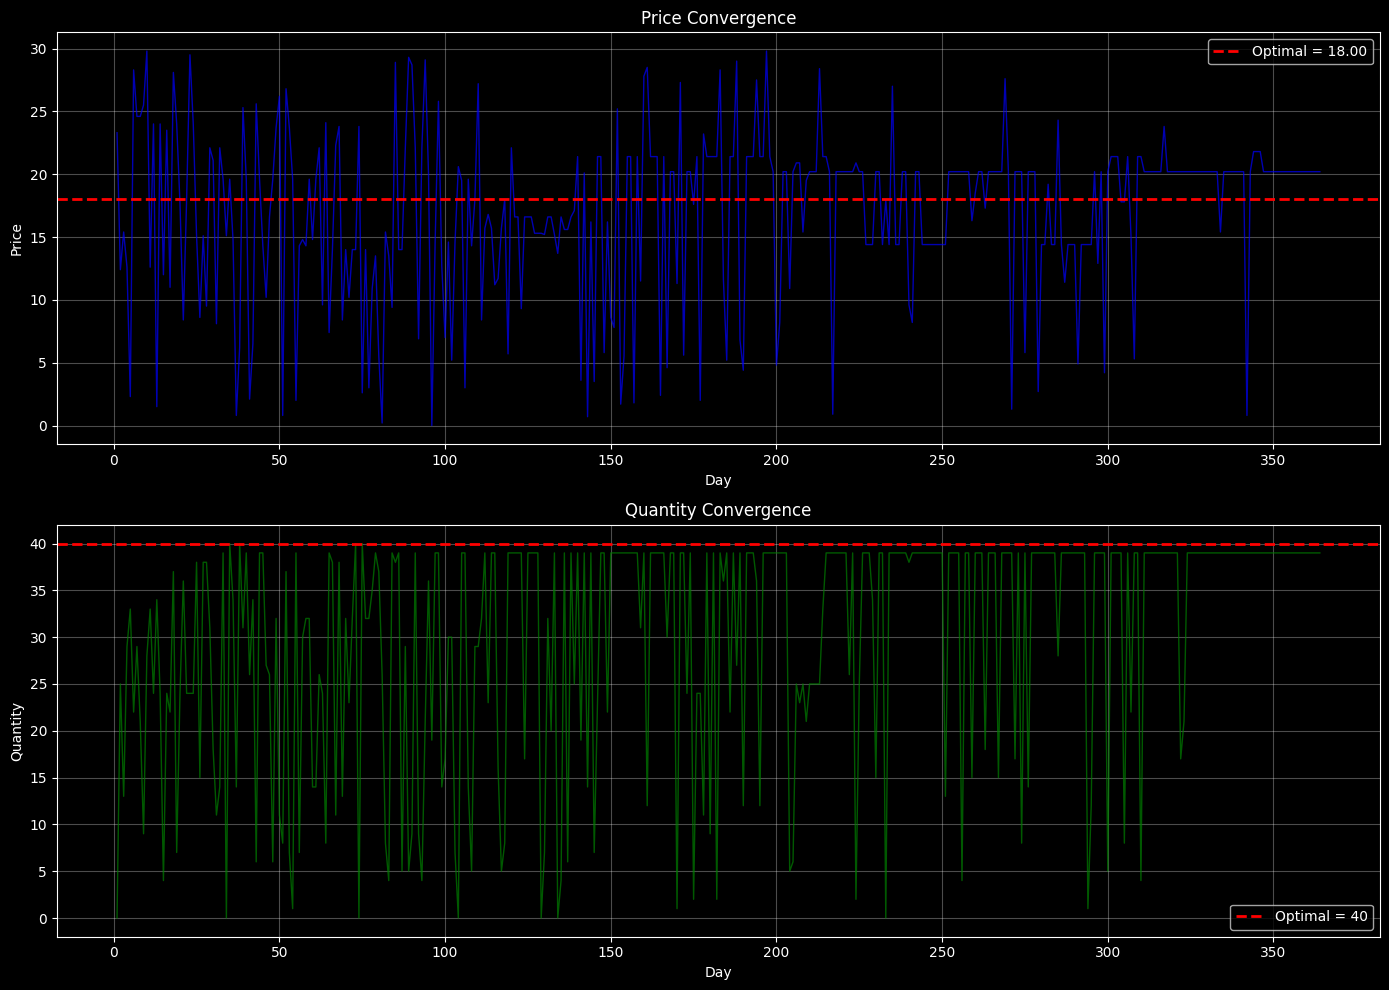

In [59]:
# Separate price and quantity data
df = agent_df.reset_index()

price_data = df[df["AgentID"] == 1][["Step", "Action", "Reward"]].rename(columns={"Action": "Price"})
qty_data = df[df["AgentID"] == 2][["Step", "Action"]].rename(columns={"Action": "Quantity"})

combined_df = pd.merge(price_data, qty_data, on="Step")
combined_df = pd.merge(combined_df, model_df, left_on="Step", right_index=True)

# Plot: Price and Quantity Convergence
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(combined_df['Step'], combined_df['Price'], color='blue', alpha=0.7, linewidth=1)
ax1.axhline(params.P_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal = {params.P_OPT:.2f}')
ax1.set_xlabel('Day')
ax1.set_ylabel('Price')
ax1.set_title('Price Convergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(combined_df['Step'], combined_df['Quantity'], color='green', alpha=0.7, linewidth=1)
ax2.axhline(params.Q_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal = {params.Q_OPT}')
ax2.set_xlabel('Day')
ax2.set_ylabel('Quantity')
ax2.set_title('Quantity Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

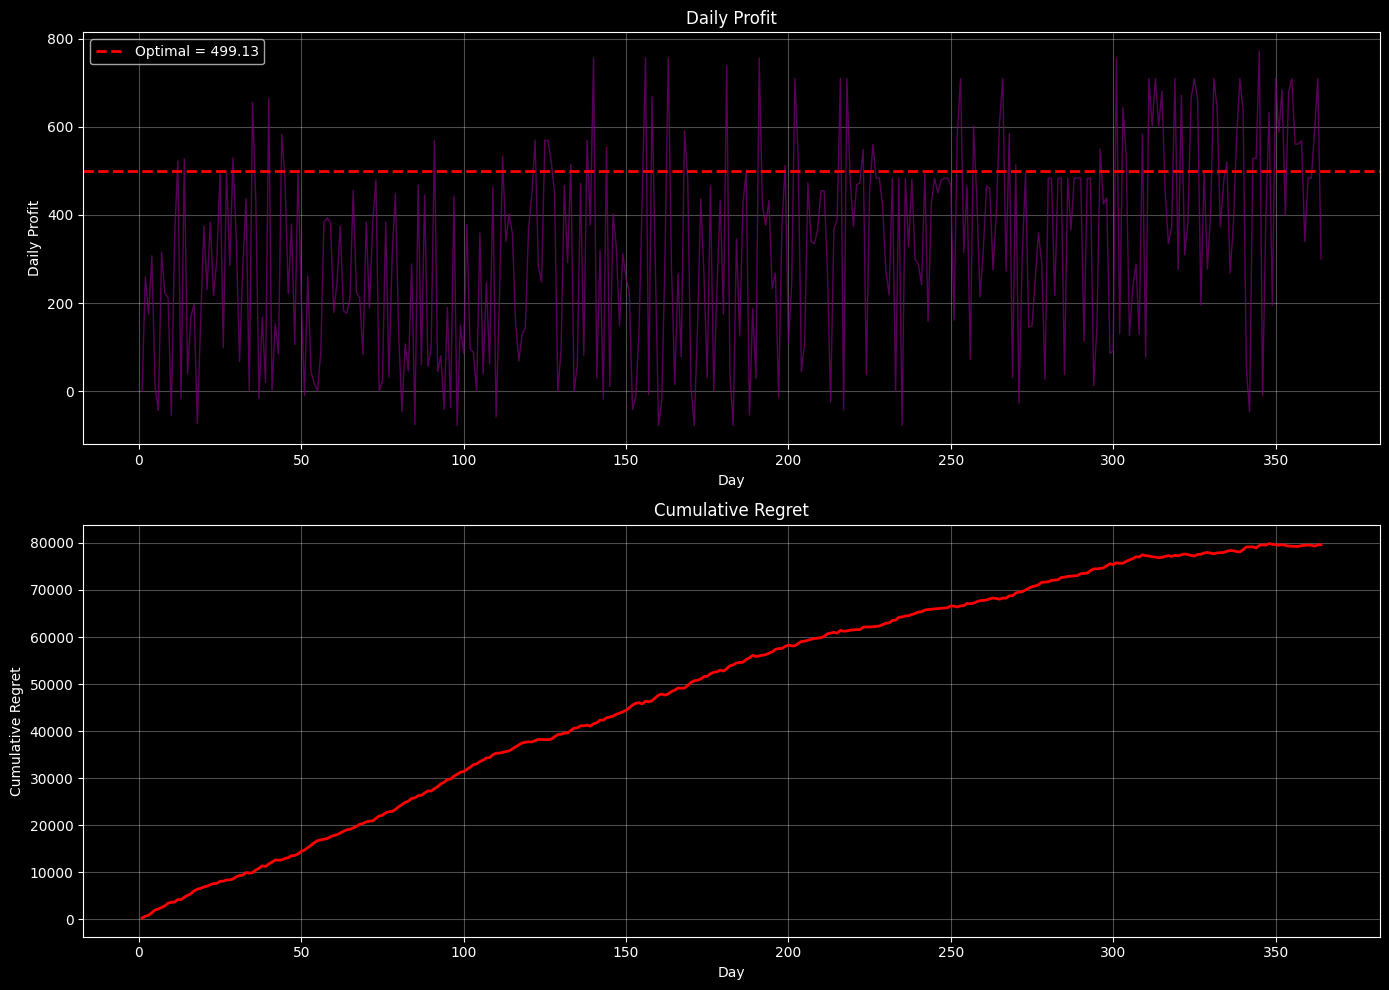

In [60]:
# Plot: Profit and Cumulative Regret
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(combined_df['Step'], combined_df['Reward'], color='purple', alpha=0.7, linewidth=1)
ax1.axhline(params.PROFIT_OPT, color='red', linestyle='--', linewidth=2, label=f'Optimal = {params.PROFIT_OPT:.2f}')
ax1.set_xlabel('Day')
ax1.set_ylabel('Daily Profit')
ax1.set_title('Daily Profit')
ax1.legend()
ax1.grid(True, alpha=0.3)

cumulative_regret = combined_df['Regret'].cumsum()
ax2.plot(combined_df['Step'], cumulative_regret, color='red', linewidth=2)
ax2.set_xlabel('Day')
ax2.set_ylabel('Cumulative Regret')
ax2.set_title('Cumulative Regret')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

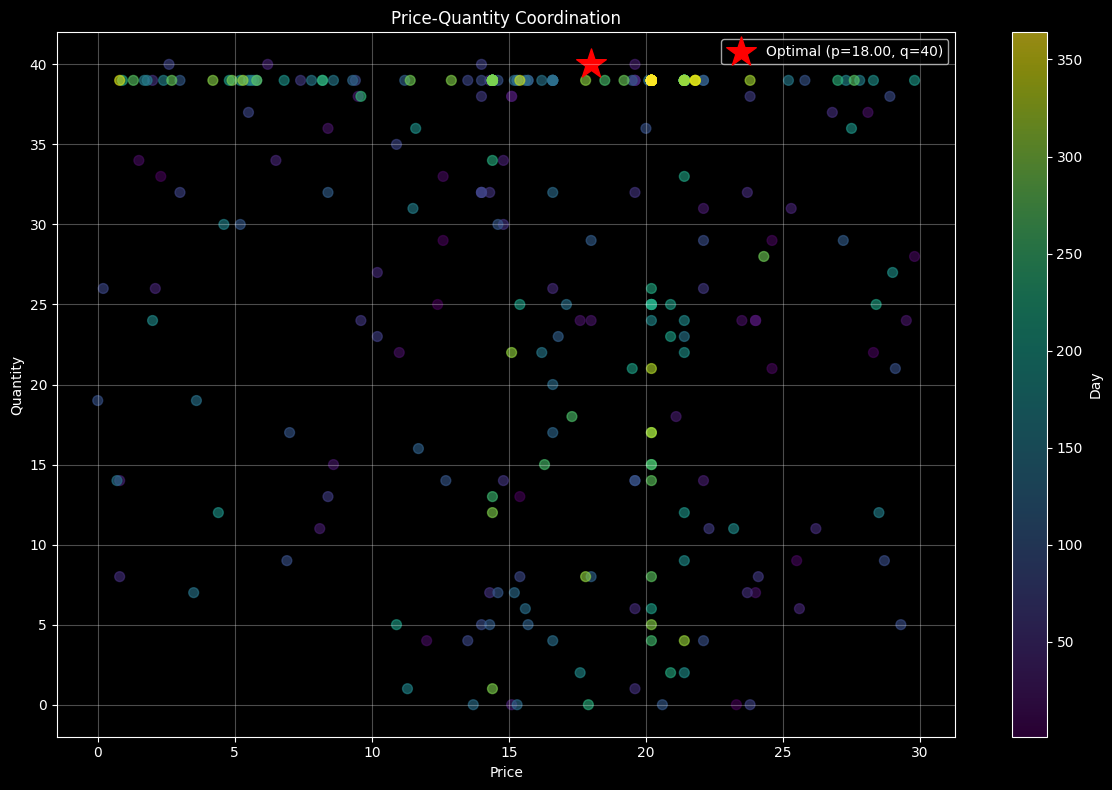

In [61]:
# Plot: Price-Quantity Coordination
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(combined_df['Price'], combined_df['Quantity'], 
                     c=combined_df['Step'], cmap='viridis', 
                     alpha=0.6, s=50)

ax.scatter([params.P_OPT], [params.Q_OPT], color='red', s=500, 
           marker='*', label=f'Optimal (p={params.P_OPT:.2f}, q={params.Q_OPT})')

plt.colorbar(scatter, ax=ax, label='Day')
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_title('Price-Quantity Coordination')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()